In [2]:
import math
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib.gridspec as GridSpec
from matplotlib import gridspec

In [3]:
# Definindo stilo
sns.set_style('darkgrid')

# Importando dados do GitHub 
url = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'

dados = pd.read_csv(url, sep = ',')

## Verificando base de dados

In [4]:
dados.shape

(127380, 136)

In [5]:
# dados.columns()
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [6]:
# Verificando valores nulos
dados.isnull().sum().sort_values(ascending = True)

NU_INSCRICAO                  0
CO_UF_PROVA                   0
NO_MUNICIPIO_PROVA            0
CO_MUNICIPIO_PROVA            0
IN_NOME_SOCIAL                0
                          ...  
TP_DEPENDENCIA_ADM_ESC    98753
TP_LOCALIZACAO_ESC        98753
TP_SIT_FUNC_ESC           98753
NO_MUNICIPIO_ESC          98753
CO_UF_ESC                 98753
Length: 136, dtype: int64

## Desafios Aula 01

Desafio01: Proporção dos inscritos por idade.

Desafio02: Descobrir de quais estados são os inscritos com 13 anos.

Desafio03: Adicionar título no gráfico

Desafio04: Plotar os Histogramas das idades dos do treineiro e não treineiros.

Desafio05: Comparar as distribuições das provas em inglês espanhol

Desafio06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

In [7]:
# Desafio01: Proporção dos inscritos por idade.
dados.NU_IDADE.value_counts(normalize = True) * 100

18    16.840948
17    16.687078
19    11.318888
20     8.174753
16     6.146962
        ...    
75     0.001570
73     0.001570
82     0.000785
77     0.000785
76     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

In [8]:
# Desafio02: Descobrir de quais estados são os inscritos com 13 anos.
dados.loc[dados.NU_IDADE == 13, 'SG_UF_RESIDENCIA'].unique()

array(['SP', 'MT', 'AP', 'BA'], dtype=object)

In [9]:
# Desafio02: Descobrir de quais estados são os inscritos com 13 anos.
dados.loc[dados.NU_IDADE == 13, 'SG_UF_RESIDENCIA'].value_counts()

SP    1
BA    1
MT    1
AP    1
Name: SG_UF_RESIDENCIA, dtype: int64

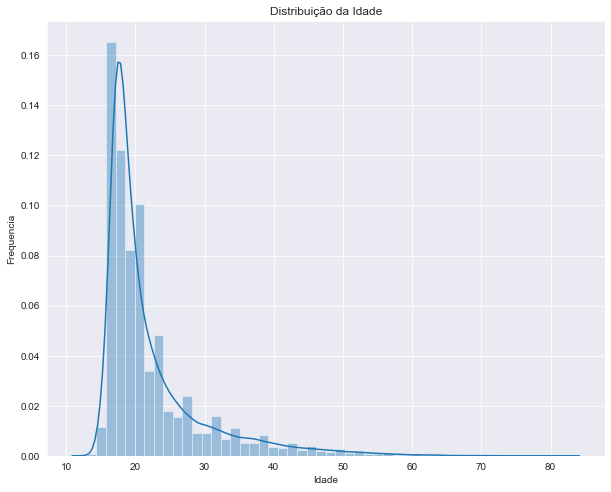

In [10]:
# Desafio03: Adicionar título no gráfico
plt.figure(figsize = (10, 8))
sns.distplot(dados.NU_IDADE, axlabel = 'Idade').set_title('Distribuição da Idade')
plt.ylabel("Frequencia")
plt.show()

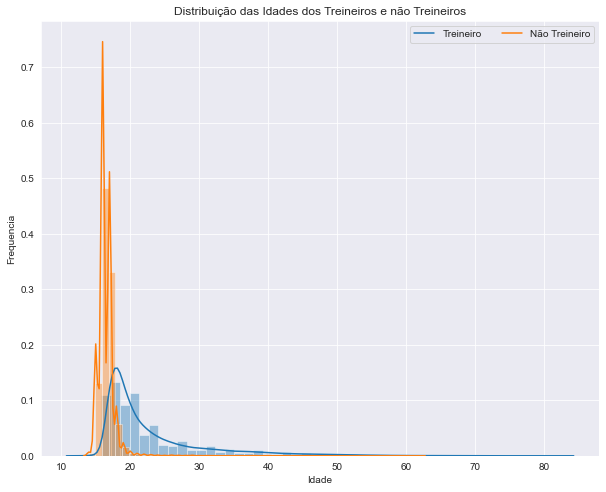

In [11]:
# Desafio04: Plotar os Histogramas das idades dos do treineiro e não treineiros.
plt.figure(figsize = (10,8))
sns.distplot(dados.loc[dados.IN_TREINEIRO == 0, 'NU_IDADE'], hist = True)
sns.distplot(dados.loc[dados.IN_TREINEIRO == 1, 'NU_IDADE'], hist = True)
plt.title('Distribuição das Idades dos Treineiros e não Treineiros')
plt.legend(labels = ['Treineiro','Não Treineiro'], ncol = 2, loc = 'upper right')
plt.xlabel('Idade')
plt.ylabel('Frequencia')
plt.show()

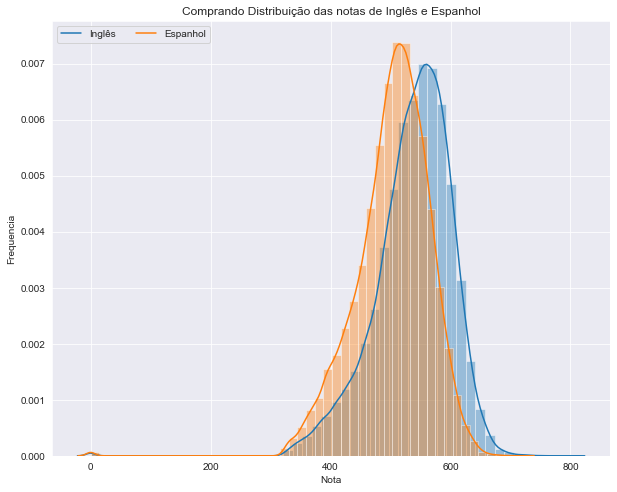

In [12]:
# Desafio05: Comparar as distribuições das provas em inglês espanhol
plt.figure(figsize = (10,8))
sns.distplot(dados.loc[dados.TP_LINGUA == 0, 'NU_NOTA_LC'], hist = True)
sns.distplot(dados.loc[dados.TP_LINGUA == 1, 'NU_NOTA_LC'], hist = True)
plt.title('Comprando Distribuição das notas de Inglês e Espanhol')
plt.legend(labels = ['Inglês','Espanhol'], ncol = 2, loc = 'upper left')
plt.xlabel('Nota')
plt.ylabel('Frequencia')
plt.show()

In [13]:
# Desafio06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.
dados['TP_SEXO'] = dados['TP_SEXO'].map({'F':'Feminino', 'M':'Masculino'})
dados['TP_COR_RACA'] = dados['TP_COR_RACA'].map({0:'NA', 6:'NA', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena'})

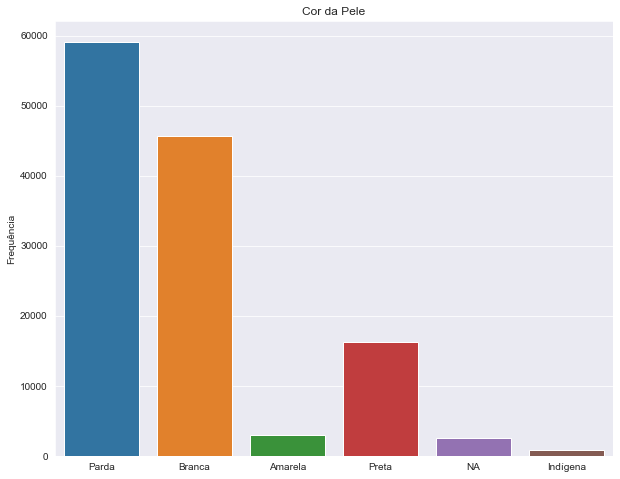

In [14]:
# Análisando cor da pele
plt.figure(figsize = (10, 8))
sns.countplot(dados.TP_COR_RACA).set_title("Cor da Pele")
plt.xlabel("")
plt.ylabel("Frequência")
plt.show()

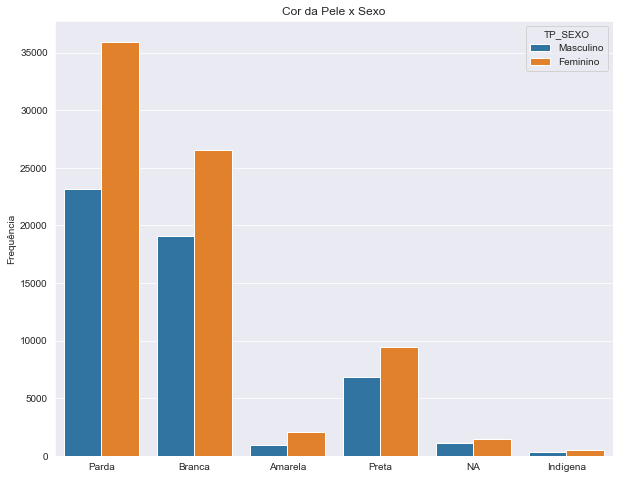

In [15]:
# Análisando cor da pele x sexo
plt.figure(figsize = (10, 8))
sns.countplot(dados.TP_COR_RACA, hue = dados.TP_SEXO).set_title("Cor da Pele x Sexo")
plt.xlabel("")
plt.ylabel("Frequência")
plt.show()

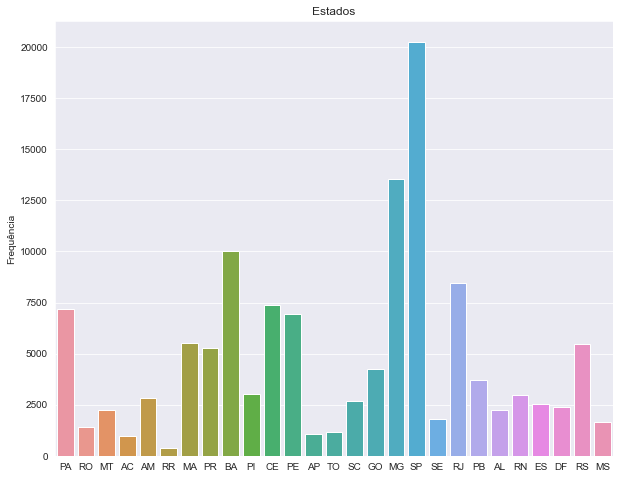

In [16]:
# Análisando UF
plt.figure(figsize = (10, 8))
sns.countplot(dados.SG_UF_RESIDENCIA).set_title("Estados")
plt.xlabel("")
plt.ylabel("Frequência")
plt.show()

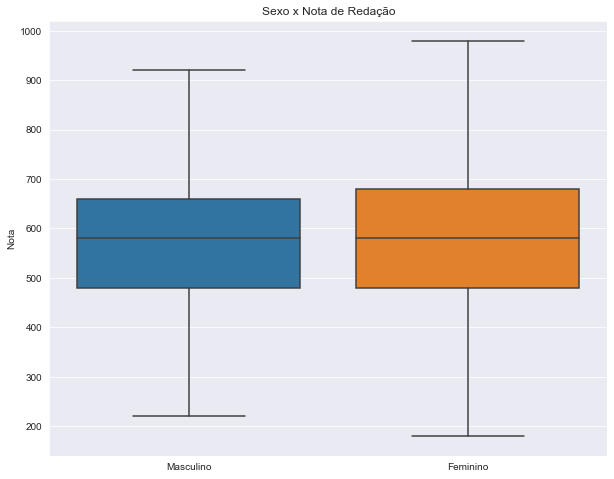

In [17]:
# Análisando nota da redação
plt.figure(figsize = (10, 8))
sns.boxplot(x = dados.TP_SEXO, y = dados.NU_NOTA_REDACAO, showfliers = False).set_title("Sexo x Nota de Redação")
plt.xlabel("")
plt.ylabel("Nota")
plt.show()

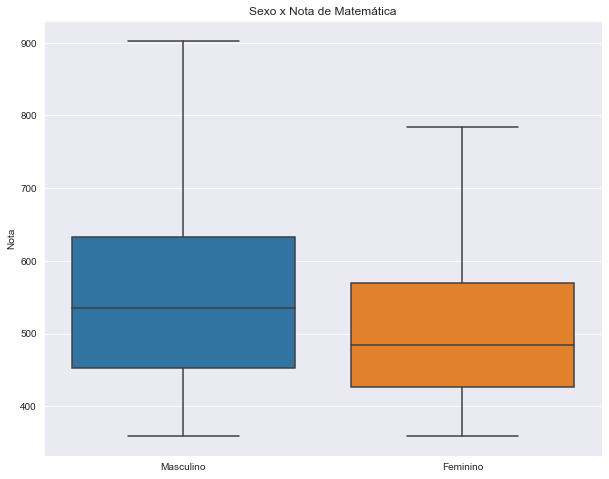

In [18]:
# Análisando nota de matemática
plt.figure(figsize = (10, 8))
sns.boxplot(x = dados.TP_SEXO, y = dados.NU_NOTA_MT, showfliers = False).set_title("Sexo x Nota de Matemática")
plt.xlabel("")
plt.ylabel("Nota")
plt.show()

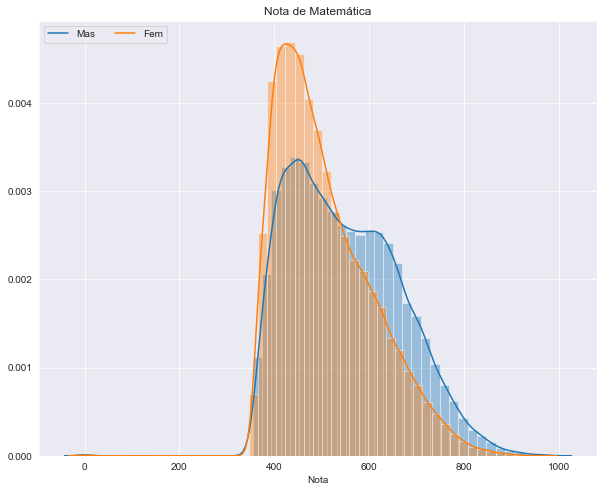

In [19]:
# Verificando distribuição de notas matemática
plt.figure(figsize = (10, 8))
sns.distplot(dados.loc[dados.TP_SEXO == 'Masculino', 'NU_NOTA_MT'], hist = True)
sns.distplot(dados.loc[dados.TP_SEXO == 'Feminino', 'NU_NOTA_MT'], hist = True)
plt.title('Nota de Matemática')
plt.xlabel("Nota")
plt.ylabel("")
plt.legend(labels = ['Mas','Fem'], ncol = 2, loc = 'upper left')
plt.show()

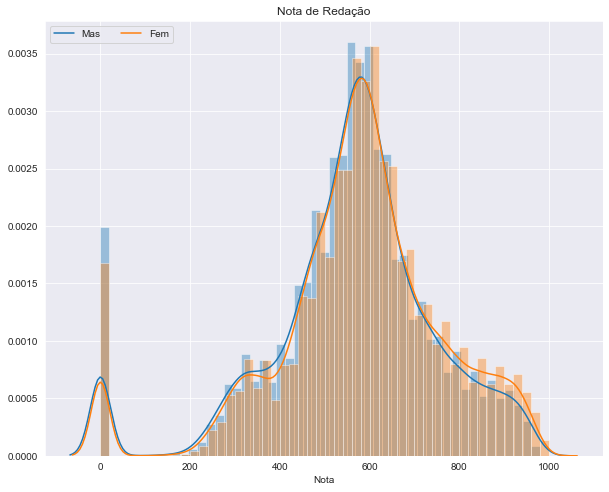

In [20]:
# Verificando distribuição de notas redação
plt.figure(figsize = (10, 8))
sns.distplot(dados.loc[dados.TP_SEXO == 'Masculino', 'NU_NOTA_REDACAO'], hist = True)
sns.distplot(dados.loc[dados.TP_SEXO == 'Feminino', 'NU_NOTA_REDACAO'], hist = True)
plt.title('Nota de Redação')
plt.xlabel("Nota")
plt.ylabel("")
plt.legend(labels = ['Mas','Fem'], ncol = 2, loc = 'upper left')
plt.show()

## Deafios Aula 02

MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos

Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.

Desafio 3: Criar uma função para plotar o boxplot do seaborn

Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente

Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

Desafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

In [21]:
# MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos
# dados.query('NU_IDADE == 13 | NU_IDADE == 14')
mega_desafio = dados[(dados["NU_IDADE"] == 13) | (dados["NU_IDADE"] == 14)]
mega_desafio

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA NO_MUNICIPIO_RESIDENCIA  \
310     190001016485    2019                  1501402                   Belém   
2818    190001116721    2019                  2202406       Capitão de Campos   
3022    190001124999    2019                  2100303           Aldeias Altas   
5748    190001229936    2019                  2908408      Conceição do Coité   
8845    190001353348    2019                  2600104   Afogados da Ingazeira   
...              ...     ...                      ...                     ...   
123574  190005947160    2019                  5004502                 Itaporã   
124683  190005993245    2019                  3538808                  Piraju   
125999  190006045655    2019                  5300108                Brasília   
127008  190006099362    2019                  3109105           Bueno Brandão   
127318  190006117130    2019                  2507507             João Pessoa   

        CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE    TP_SEXO  \
310                   15               PA        14   Feminino   
2818                  22               PI        14   Feminino   
3022                  21               MA        14  Masculino   
5748                  29               BA        14   Feminino   
8845                  26               PE        14   Feminino   
...                  ...              ...       ...        ...   
123574                50               MS        14  Masculino   
124683                35               SP        14   Feminino   
125999                53               DF        14   Feminino   
127008                31               MG        14   Feminino   
127318                25               PB        14   Feminino   

        TP_ESTADO_CIVIL TP_COR_RACA  ...  Q016  Q017 Q018  Q019 Q020  Q021  \
310                   1      Branca  ...     A     A    A     B    B     A   
2818                  1       Parda  ...     A     A    A     B    A     A   
3022                  1       Parda  ...     B     A    A     B    B     A   
5748                  1          NA  ...     A     A    A     B    A     A   
8845                  1       Parda  ...     B     A    A     B    B     A   
...                 ...         ...  ...   ...   ...  ...   ...  ...   ...   
123574                1      Branca  ...     A     A    B     B    B     B   
124683                1      Branca  ...     B     B    B     B    B     B   
125999                1       Parda  ...     B     A    A     E    B     B   
127008                1      Branca  ...     A     A    A     B    A     A   
127318                1       Parda  ...     A     A    A     B    A     A   

        Q022  Q023  Q024  Q025  
310        C     A     A     A  
2818       C     A     A     A  
3022       D     A     B     B  
5748       C     A     A     A  
8845       D     A     B     B  
...      ...   ...   ...   ...  
123574     E     A     E     B  
124683     E     A     B     B  
125999     E     B     B     B  
127008     C     A     A     B  
127318     D     A     A     B  

[145 rows x 136 columns]

In [22]:
p_mega_desafio = mega_desafio.SG_UF_RESIDENCIA.value_counts(normalize = True) * 100
p_mega_desafio

PE    12.413793
CE    10.344828
BA     9.655172
PA     8.275862
MG     7.586207
SP     7.586207
MA     6.206897
PI     4.827586
GO     4.827586
PB     4.827586
MT     2.758621
AM     2.758621
DF     2.758621
SE     2.068966
PR     2.068966
TO     2.068966
SC     1.379310
RO     1.379310
AL     1.379310
RJ     0.689655
AC     0.689655
AP     0.689655
MS     0.689655
RS     0.689655
RN     0.689655
ES     0.689655
Name: SG_UF_RESIDENCIA, dtype: float64

In [23]:
p_mega_desafio = p_mega_desafio.reset_index()

Text(0.5, 1.0, 'Alunos de 13 e 14 anos')

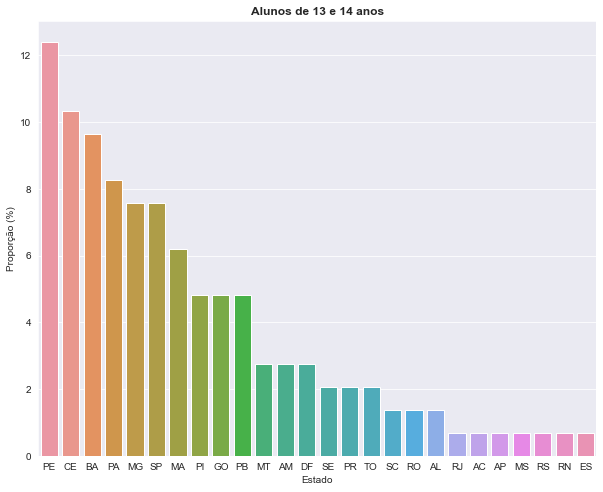

In [24]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'index', y = 'SG_UF_RESIDENCIA', data = p_mega_desafio)
plt.xlabel("Estado")
plt.ylabel("Proporção (%)")
plt.title("Alunos de 13 e 14 anos", fontweight = "bold")

In [25]:
# Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.
gui_desafio = dados[dados["NU_IDADE"] < 18]
gui_desafio

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA NO_MUNICIPIO_RESIDENCIA  \
0       190001004661    2019                  1506138                Redenção   
4       190001004776    2019                  1500800              Ananindeua   
8       190001004986    2019                  1502400               Castanhal   
12      190001005076    2019                  1506138                Redenção   
14      190001005081    2019                  1506807                Santarém   
...              ...     ...                      ...                     ...   
127350  190006118551    2019                  2611606                  Recife   
127355  190006118808    2019                  3131307                Ipatinga   
127361  190006119076    2019                  4104303            Campo Mourão   
127371  190006119825    2019                  2506103                Fagundes   
127375  190006120035    2019                  3142700             Montalvânia   

        CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE    TP_SEXO  \
0                     15               PA        17  Masculino   
4                     15               PA        16   Feminino   
8                     15               PA        17   Feminino   
12                    15               PA        15  Masculino   
14                    15               PA        17   Feminino   
...                  ...              ...       ...        ...   
127350                26               PE        16  Masculino   
127355                31               MG        17   Feminino   
127361                41               PR        17  Masculino   
127371                25               PB        16  Masculino   
127375                31               MG        17   Feminino   

        TP_ESTADO_CIVIL TP_COR_RACA  ...  Q016  Q017 Q018  Q019 Q020  Q021  \
0                     1       Parda  ...     A     A    A     A    B     A   
4                     1       Parda  ...     A     A    A     B    A     A   
8                     1       Parda  ...     B     A    A     C    B     A   
12                    1       Parda  ...     B     A    A     B    B     A   
14                    1       Parda  ...     A     A    A     B    A     A   
...                 ...         ...  ...   ...   ...  ...   ...  ...   ...   
127350                1      Branca  ...     B     A    B     E    B     B   
127355                1       Parda  ...     B     A    A     C    A     A   
127361                1      Branca  ...     B     A    B     C    A     B   
127371                1       Parda  ...     A     A    A     B    A     A   
127375                1      Branca  ...     A     A    A     B    A     A   

        Q022  Q023  Q024  Q025  
0          C     A     B     B  
4          D     A     A     B  
8          E     A     A     B  
12         C     A     A     B  
14         D     A     A     B  
...      ...   ...   ...   ...  
127350     E     B     B     B  
127355     D     A     B     B  
127361     D     A     B     B  
127371     D     A     A     B  
127375     D     A     B     B  

[31240 rows x 136 columns]

In [26]:
p_gui_desafio = gui_desafio['SG_UF_RESIDENCIA'].value_counts(normalize = True) * 100
p_gui_desafio

SP    23.434699
MG    10.070423
BA     6.379641
CE     6.251601
PE     5.777849
PR     5.646607
RJ     5.284891
PA     4.058899
GO     3.838028
MA     3.725992
RS     3.169014
PB     2.682458
SC     2.544814
PI     2.170294
MT     1.959027
ES     1.654930
DF     1.510883
AL     1.427657
RN     1.373239
AM     1.370038
MS     1.347631
SE     1.296415
TO     1.101152
RO     0.749040
AP     0.601793
AC     0.348912
RR     0.224072
Name: SG_UF_RESIDENCIA, dtype: float64

In [27]:
p_gui_desafio = p_gui_desafio.reset_index()

Text(0.5, 1.0, 'Alunos menores de 18 anos')

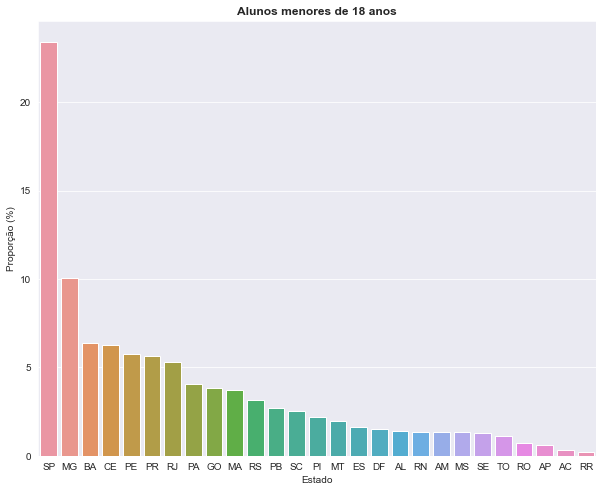

In [28]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'index', y = 'SG_UF_RESIDENCIA', data = p_gui_desafio)
plt.xlabel("Estado")
plt.ylabel("Proporção (%)")
plt.title("Alunos menores de 18 anos", fontweight = "bold")

In [29]:
# Desafio 3: Criar uma função para plotar o boxplot do seaborn
def sBoxplot(y, title, xl, yl):
    ordem = dados.Q006.unique()
    ordem.sort()

    plt.figure(figsize = (10, 8))
    sns.boxplot(x = 'Q006', y = y, data = dados, order = ordem, showfliers = False)
    plt.title(title)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.show()

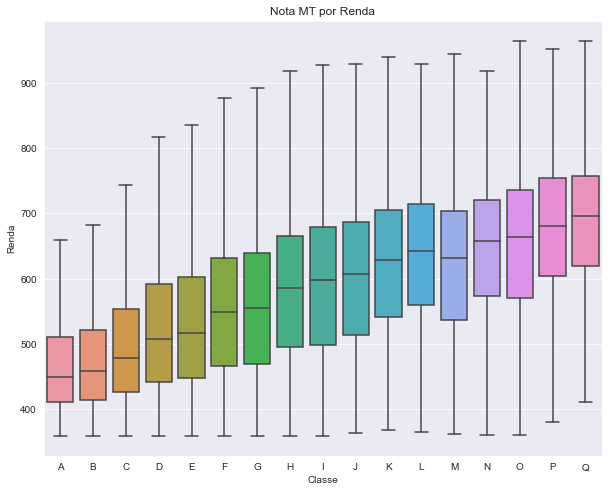

In [30]:
sBoxplot('NU_NOTA_MT', 'Nota MT por Renda', 'Classe', 'Renda')

In [31]:
# Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente
dados.query('NU_NOTA_CN == 0 ')['TP_PRESENCA_CN'].value_counts()

1    18
Name: TP_PRESENCA_CN, dtype: int64

18 PRESENTES ZEROU A PROVA

In [32]:
dados.query('NU_NOTA_CH == 0')['TP_PRESENCA_CH'].value_counts()

1    176
Name: TP_PRESENCA_CH, dtype: int64

176 PRESENTES ZEROU A PROVA

In [33]:
dados.query('NU_NOTA_MT == 0')['TP_PRESENCA_MT'].value_counts()

1    25
Name: TP_PRESENCA_MT, dtype: int64

25 PRESENTES ZEROU A PROVA

In [34]:
dados.query('NU_NOTA_LC == 0')['TP_PRESENCA_LC'].value_counts()

1    96
Name: TP_PRESENCA_LC, dtype: int64

96 PRESENTES ZEROU A RPOVA